In [63]:
# Import the required module for working with zip files
import zipfile

# Method 1: Read the zip file
with zipfile.ZipFile('Divvy_Trips_2019_Q1.zip', 'r') as zip_file:
    # List contents of the zip file
    print(zip_file.namelist())
    
    # Extract all contents
    zip_file.extractall()

['Divvy_Trips_2019_Q1.csv', '__MACOSX/._Divvy_Trips_2019_Q1.csv']


In [89]:
# Import pandas library for data manipulation and analysis
import pandas as pd

# Read the CSV file 'Divvy_Trips_2019_Q1.csv' into a pandas DataFrame
df = pd.read_csv('Divvy_Trips_2019_Q1.csv')

# Display the first 5 rows of the DataFrame
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [65]:
# Convert 'start_time' column to datetime format for proper time-based operations
df['start_time'] = pd.to_datetime(df['start_time'])
# Convert 'end_time' column to datetime format for proper time-based operations
df['end_time'] = pd.to_datetime(df['end_time'])

In [79]:
# Convert 'tripduration' column to numeric format, replacing any non-numeric values with NaN
df['tripduration'] = pd.to_numeric(df['tripduration'], errors='coerce')  # 'coerce' will handle any non-numeric values
# Convert trip duration from seconds to minutes by dividing by 60
df['tripduration'] = df['tripduration']/60

In [81]:
df['tripduration'].dtype

dtype('float64')

In [33]:
df.drop_duplicates(inplace=True)

In [35]:
df.dropna(inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345357 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            345357 non-null  int64         
 1   start_time         345357 non-null  datetime64[ns]
 2   end_time           345357 non-null  datetime64[ns]
 3   bikeid             345357 non-null  int64         
 4   tripduration       345357 non-null  float64       
 5   from_station_id    345357 non-null  int64         
 6   from_station_name  345357 non-null  object        
 7   to_station_id      345357 non-null  int64         
 8   to_station_name    345357 non-null  object        
 9   usertype           345357 non-null  object        
 10  gender             345357 non-null  object        
 11  birthyear          345357 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 34.3+ MB


In [83]:
# Count the frequency of each unique value in the 'usertype' column of the dataframe
# Returns a Series with usertype values as index and their counts as values
df['usertype'].value_counts()

usertype
Subscriber    339423
Customer        5934
Name: count, dtype: int64

In [41]:
df.groupby('usertype')['tripduration'].mean()

usertype
Customer      37.020635
Subscriber    13.856945
Name: tripduration, dtype: float64

In [43]:
df['from_station_name'].value_counts().head(10)

from_station_name
Clinton St & Washington Blvd    7596
Clinton St & Madison St         6329
Canal St & Adams St             6254
Canal St & Madison St           4504
Columbus Dr & Randolph St       4466
Kingsbury St & Kinzie St        4297
Michigan Ave & Washington St    3703
Franklin St & Monroe St         3456
LaSalle St & Jackson Blvd       3202
Dearborn St & Monroe St         3169
Name: count, dtype: int64

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

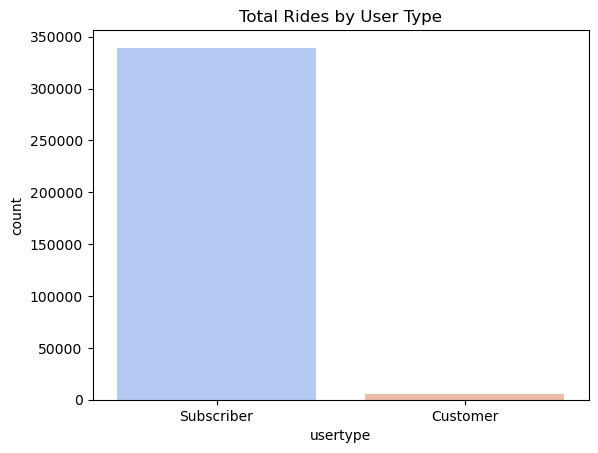

In [49]:
sns.countplot(data=df, x='usertype', palette='coolwarm')
plt.title("Total Rides by User Type")
plt.show()

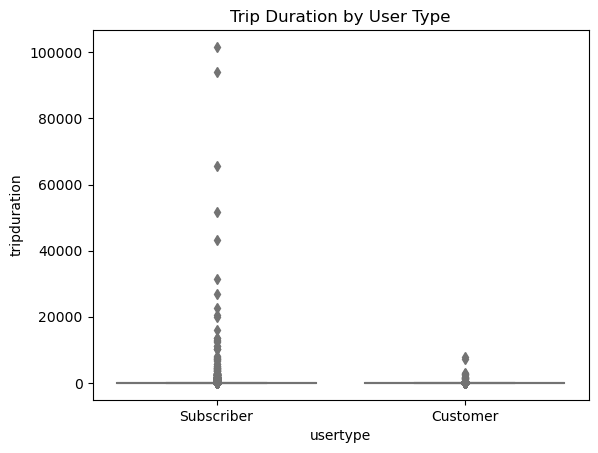

In [53]:
sns.boxplot(data=df, x='usertype', y='tripduration', palette='pastel')
plt.title("Trip Duration by User Type")
plt.show()

In [55]:
# Extract month name from start_time
df['month'] = df['start_time'].dt.strftime('%B')

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']

df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)


In [57]:
# Group by month and usertype
monthly_rides = df.groupby(['month', 'usertype']).size().reset_index(name='ride_count')

# Display first few rows
monthly_rides.head()


,month,usertype,ride_count
0,January,Customer,1187
1,January,Subscriber,97998
2,February,Customer,732
3,February,Subscriber,92781
4,March,Customer,4015


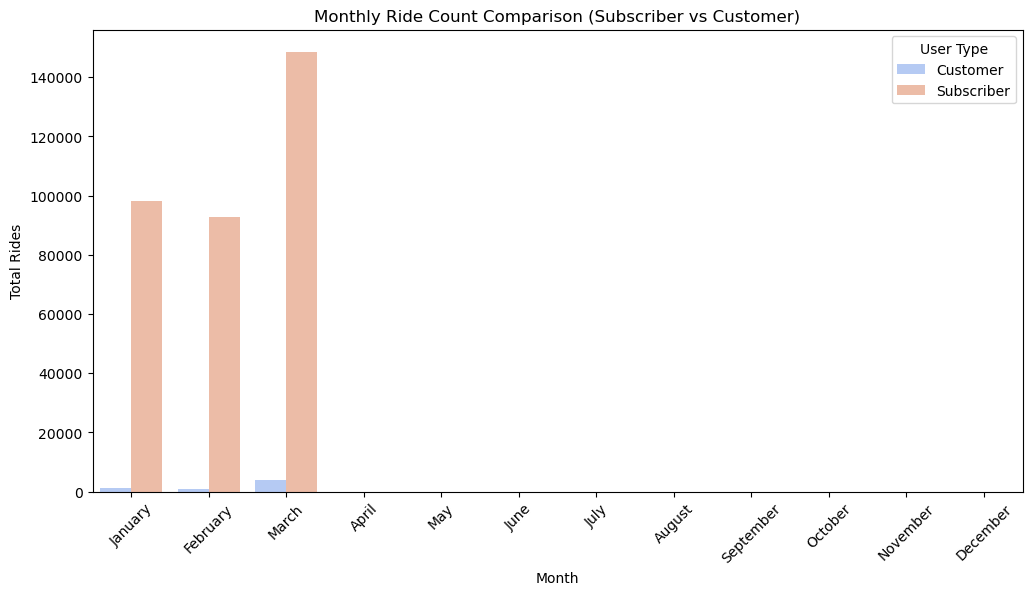

In [85]:
# Create a figure with specified dimensions (12 inches width, 6 inches height)
plt.figure(figsize=(12, 6))

# Create a grouped bar plot using seaborn
# x-axis: months, y-axis: ride count, groups: user type, color scheme: coolwarm
sns.barplot(data=monthly_rides, x='month', y='ride_count', hue='usertype', palette='coolwarm')

# Set the title of the plot
plt.title("Monthly Ride Count Comparison (Subscriber vs Customer)")

# Label the x and y axes
plt.xlabel("Month")
plt.ylabel("Total Rides")

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add a legend with a title
plt.legend(title="User Type")

# Display the plot
plt.show()

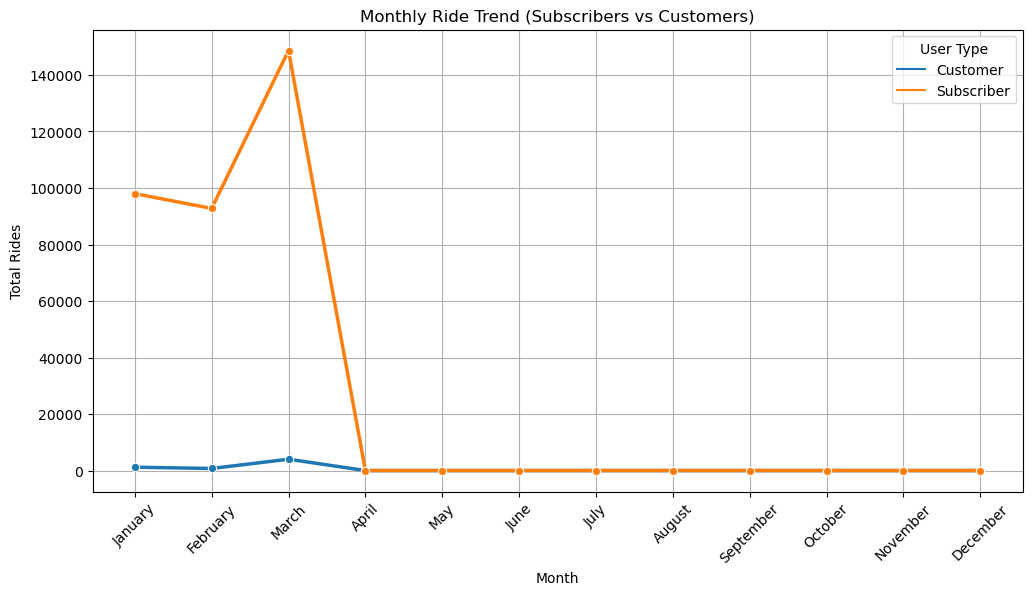

In [87]:
# Create a figure with specified dimensions (12 inches width, 6 inches height)
plt.figure(figsize=(12, 6))

# Create a line plot using seaborn showing ride count trends by user type
# Data is from monthly_rides DataFrame, x-axis is month, y-axis is ride_count
# Lines are colored by usertype, with circle markers and thicker lines
sns.lineplot(data=monthly_rides, x='month', y='ride_count', hue='usertype', marker="o", linewidth=2.5)

# Set the title of the plot
plt.title("Monthly Ride Trend (Subscribers vs Customers)")

# Label the x and y axes
plt.xlabel("Month")
plt.ylabel("Total Rides")

# Rotate x-axis labels 45 degrees for better readability
plt.xticks(rotation=45)

# Add a legend with "User Type" as the title
plt.legend(title="User Type")

# Add grid lines to the plot
plt.grid()

# Display the plot
plt.show()